# Imports

In [6]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

from config.settings import saved_models_path
from src.utils.column_import import columns_dif

s_x, s_y, v_x, v_y, a_x, a_y = columns_dif
 

## Load models 

In [8]:
# Load the models
def load_model(model_name):
    model_file_path = os.path.join(saved_models_path, f'relative_model_two_cars/{model_name}.pkl')
    
    if os.path.exists(model_file_path):
        with open(model_file_path, 'rb') as file:
            loaded_model = pickle.load(file)
        
        print(f'Model "{model_name}" loaded from: {model_file_path}')
        return loaded_model
    else:
        print(f'Model file not found for "{model_name}"')
        print(model_file_path)
        return None

loaded_first_model = load_model('first_model')
loaded_second_model = load_model('second_model')

Model "first_model" loaded from: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/relative_model_two_cars/first_model.pkl
Model "second_model" loaded from: /home/ali/tum/motion_planning/social_ai_practical_course/results/models/relative_model_two_cars/second_model.pkl


## Load the coefficients

In [9]:
# Get the coefficients
c_1_overline = loaded_first_model.coef_[0]
c_3_overline = loaded_first_model.coef_[1]
c_2_overline = loaded_second_model.coef_[0]
c_4_overline = loaded_second_model.coef_[1]

print(f'C̅₁: {c_1_overline}')
print(f'C̅₂: {c_2_overline}')
print(f'C̅₃: {c_3_overline}')
print(f'C̅₄: {c_4_overline}')

C̅₁: -0.7368767741604569
C̅₂: -1.0264503991594718
C̅₃: 5.12453729656904
C̅₄: -11.213253605631827


Rearange the constants:
\begin{align}
c_2 =  \frac{1}{\overline c_2}
\\ c_1 = \overline c_1  \overline c_2
\\ c_4 = \frac{1}{\overline c_4}
\\ c_3 = \overline c_3 \overline c_4
\end{align}



In [10]:
# Rearange the coefficients
c_1 = c_1_overline * c_2_overline
c_2 = 1 / c_2_overline
c_3 = c_3_overline * c_4_overline
c_4 = 1 / c_4_overline

print(f'c₁: {c_1}')
print(f'c₂: {c_2}')
print(f'c₃: {c_3}')
print(f'c₄: {c_4}')

c₁: 0.756367458968345
c₂: -0.9742311959923916
c₃: -57.46273631794756
c₄: -0.08918018223522142


# Integration method

Now we put the constants into our integration model and test it on accuracy
\begin{align}
v(k+1) &= v(k) + c_1 a(k) + c_2(k-1)\\
s(k+1) &= s(k) + dt  \ v(k)+ c_3 a(k) + c_4 a(k-1)
\end{align}

We have to split each entry into its x- and y-components
\begin{align}
v_x(k+1)    &= v_x(k) + c_1 a_x(k)  +  c_2a_x(k-1)
\\ v_y(k+1) &= v_y(k) + c_1 a_y(k)  + c_2 a_y(k-1)
\\ s_x(k+1) &= s_x(k) + dt  \ v_x(k)+ c_3 a_x(k) + c_4 a_x(k-1)
\\ s_y(k+1) &= s_y(k) + dt \ v_y(k) + c_3 a_y(k) + c_4 a_y(k-1)
\end{align}




In [11]:
# Index shifting:
# k-1         k           k+1
# 0:-2         1:-1        2:

In [12]:
v_x_test = v_x[1:-1] + c_1 * a_x[1:-1] + c_2 * a_x[0:-2]
v_y_test = v_y[1:-1] + c_1 * a_y[1:-1] + c_2 * a_y[0:-2]


In [13]:
dt = 0.04
s_x_test = s_x[1:-1] + dt * v_x[1:-1] + c_3 * a_x[1:-1] + c_4 * a_x[0:-2]
s_y_test = s_y[1:-1] + dt * v_y[1:-1] + c_3 * a_y[1:-1] + c_4 * a_y[0:-2]


MSE: 0.14647662479792642


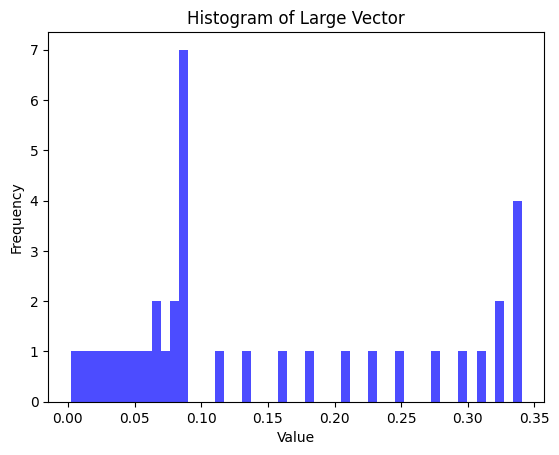

MSE: 0.157396609824243


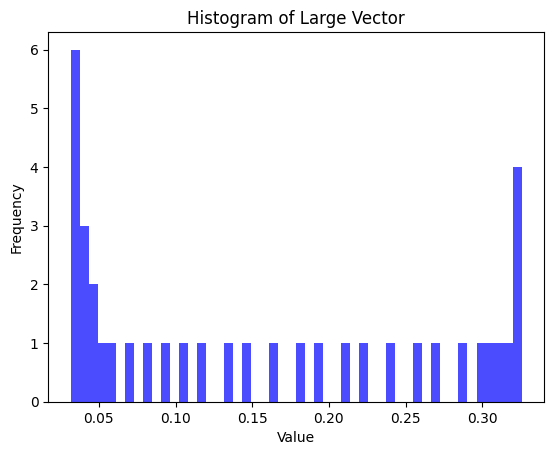

MSE: 26.24130665258584


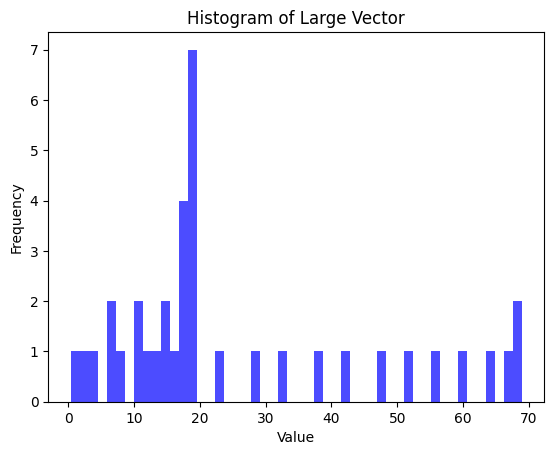

MSE: 29.849245246457265


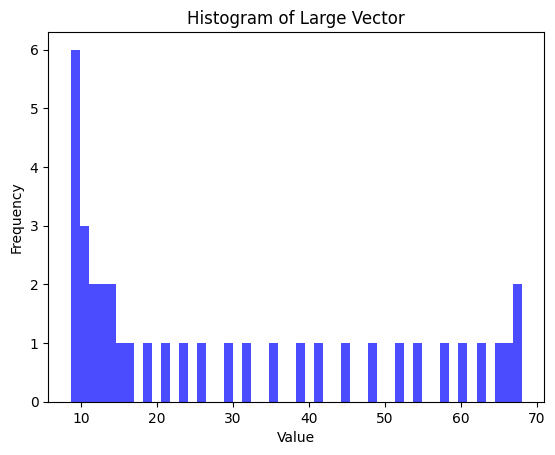

In [14]:
def mean_error(actual, test):
    difference = np.abs(actual - test)
    
    # Calculate the
    mean = np.mean(difference)
    print(f"MSE: {mean}")

    # Print a bar graph
    plt.hist(difference, bins=50, color='blue', alpha=0.7, log=False)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Histogram of Large Vector')
    plt.show()

mean_error(v_x_test,v_x[2:])
mean_error(v_y_test,v_y[2:])
mean_error(s_x_test,s_x[2:])
mean_error(s_y_test,s_y[2:])